In [5]:
import torch
import torch.nn as nn

In [6]:
model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(1, 32, kernel_size=3, padding='same'))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(2))
model.add_module('conv2', nn.Conv2d(32, 64, kernel_size=3, padding='same'))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(2))
model.add_module('flatten', nn.Flatten())
model.add_module('dense1', nn.Linear(3136, 100))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(0.3))
model.add_module('dense2', nn.Linear(100, 10))

In [7]:
model.load_state_dict(torch.load('best_cnn_model.pt', weights_only=True))

<All keys matched successfully>

In [8]:
# 모델의 층 목록 - model.children()
layers = [layer for layer in model.children()]

layers

[Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same),
 ReLU(),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same),
 ReLU(),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=3136, out_features=100, bias=True),
 ReLU(),
 Dropout(p=0.3, inplace=False),
 Linear(in_features=100, out_features=10, bias=True)]

In [9]:
model.conv1

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [10]:
# model.named_children() : (층의 이름, 층 객체)

In [11]:
for name, layer in model.named_children():
    print("name:", name, "layer:", layer)

name: conv1 layer: Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
name: relu1 layer: ReLU()
name: pool1 layer: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
name: conv2 layer: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
name: relu2 layer: ReLU()
name: pool2 layer: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
name: flatten layer: Flatten(start_dim=1, end_dim=-1)
name: dense1 layer: Linear(in_features=3136, out_features=100, bias=True)
name: relu3 layer: ReLU()
name: dropout layer: Dropout(p=0.3, inplace=False)
name: dense2 layer: Linear(in_features=100, out_features=10, bias=True)


In [12]:
# 특성맵 시각화 - 첫 번째 Conv 층 통과한 특성맵

# 패션 MNIST 데이터
from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root='.', train=True, download=True)
train_input = fm_train.data

100.0%
100.0%
100.0%
100.0%


In [13]:
ankle_boot = train_input[0].reshape(1, 1, 28, 28) / 255.0

In [14]:
model.eval()
with torch.no_grad():
    feature_maps = model.conv1(ankle_boot)
    feature_maps = model.relu1(feature_maps)

In [15]:
feature_maps.shape

torch.Size([1, 32, 28, 28])

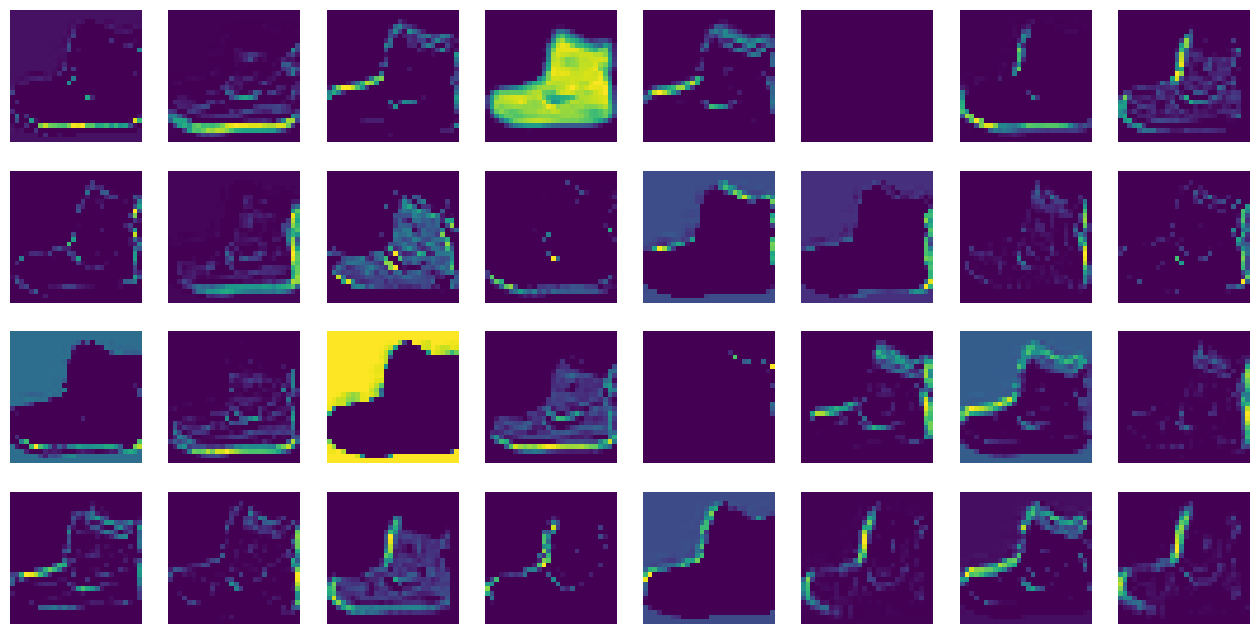

In [17]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(4, 8, figsize=(16, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, i * 8 + j, :, :])
        axs[i, j].axis('off')

plt.show()

In [18]:
# 특성맵 시각화 - 두번 째 Conv 층을 통과한 특성맵 64

In [19]:
model.eval()
with torch.no_grad():
    feature_maps = model.conv1(ankle_boot)
    feature_maps = model.relu1(feature_maps)
    feature_maps = model.pool1(feature_maps)
    feature_maps = model.conv2(feature_maps)
    feature_maps = model.relu2(feature_maps)

In [22]:
model.eval()

x = ankle_boot
with torch.no_grad():
    for name, layer in model.named_children():
        x = layer(x)
        if name == 'relu2':
            break

feature_maps = x

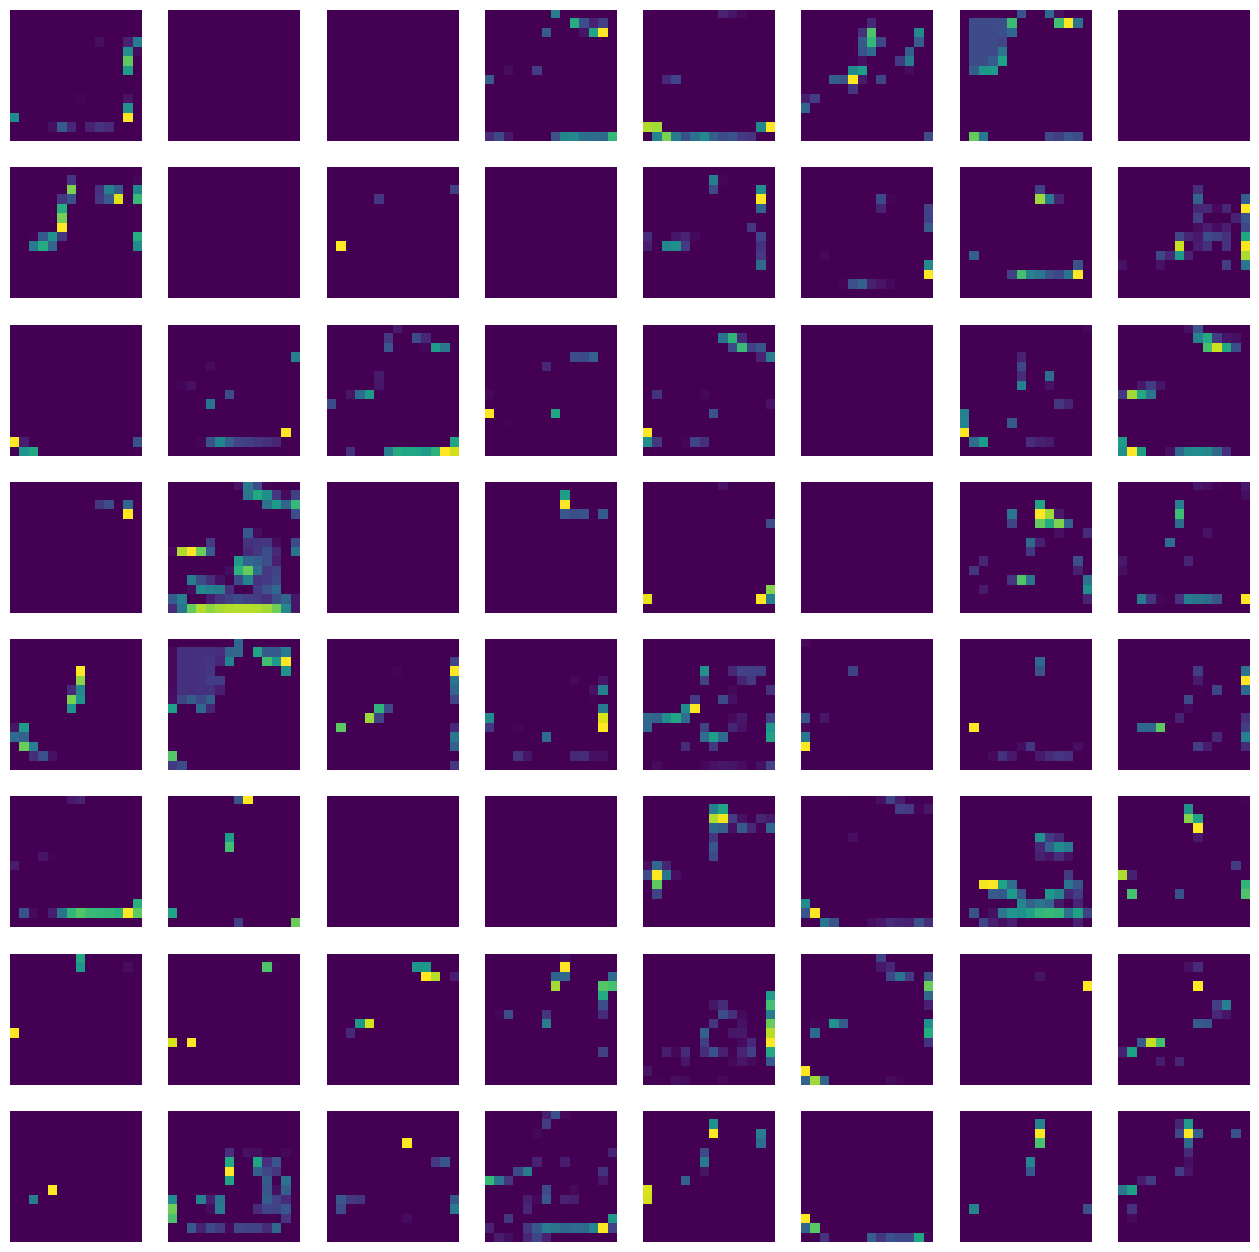

In [23]:
_, axs = plt.subplots(8, 8, figsize=(16, 16))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, i * 8 + j, :, :])
        axs[i, j].axis('off')

plt.show()